In [1]:
import earthaccess
import geopandas as gpd
from pathlib import Path
import pandas as pd

# Authenticate - will prompt for credentials first time
auth = earthaccess.login()

# If login fails, try:
# auth = earthaccess.login(strategy="interactive")

/opt/homebrew/Caskroom/miniforge/base/envs/kolkata_flood/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Kolkata Metropolitan Area + Hooghly River extent
# Generous bbox to capture river upstream/downstream
KOLKATA_BBOX = (
    87.8,   # lon_min (west)
    22.0,   # lat_min (south)
    88.6,   # lon_max (east)
    23.2    # lat_max (north)
)

print(f"Searching SWOT data for bbox: {KOLKATA_BBOX}")
print(f"Center: ~{(KOLKATA_BBOX[0]+KOLKATA_BBOX[2])/2:.2f}°E, {(KOLKATA_BBOX[1]+KOLKATA_BBOX[3])/2:.2f}°N")

Searching SWOT data for bbox: (87.8, 22.0, 88.6, 23.2)
Center: ~88.20°E, 22.60°N


In [3]:
# Search for River Reach data (water level + discharge)
river_results = earthaccess.search_data(
    short_name='SWOT_L2_HR_RiverSP_D',
    temporal=('2023-01-01', '2025-11-24'),
    bounding_box=KOLKATA_BBOX
)

print(f"River Vector granules found: {len(river_results)}")

# Preview first few results
if river_results:
    for i, r in enumerate(river_results[:5]):
        print(f"\n{i+1}. {r['umm']['GranuleUR']}")

River Vector granules found: 563

1. SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01

2. SWOT_L2_HR_RiverSP_Node_001_202_AS_20230728T100629_20230728T101541_PGD0_01

3. SWOT_L2_HR_RiverSP_Reach_001_217_AS_20230728T231753_20230728T232546_PGD0_01

4. SWOT_L2_HR_RiverSP_Node_001_217_AS_20230728T231753_20230728T232546_PGD0_01

5. SWOT_L2_HR_RiverSP_Reach_001_230_AS_20230729T100650_20230729T101453_PGD0_01


In [4]:
# Raster gives gridded water surface elevation - good for spatial analysis
raster_results = earthaccess.search_data(
    short_name='SWOT_L2_HR_Raster_D',
    temporal=('2023-01-01', '2025-11-24'),
    bounding_box=KOLKATA_BBOX
)

print(f"Raster granules found: {len(raster_results)}")

Raster granules found: 675


In [5]:
# Lake product might capture Kolkata's larger water bodies
lake_results = earthaccess.search_data(
    short_name='SWOT_L2_HR_LakeSP_D',
    temporal=('2023-01-01', '2025-11-24'),
    bounding_box=KOLKATA_BBOX
)

print(f"Lake Vector granules found: {len(lake_results)}")

Lake Vector granules found: 762


In [6]:
print("=" * 60)
print("SWOT DATA AVAILABILITY FOR KOLKATA")
print("=" * 60)
print(f"River Reaches: {len(river_results)} granules")
print(f"Raster (gridded): {len(raster_results)} granules")
print(f"Lakes/Water Bodies: {len(lake_results)} granules")
print("=" * 60)

# Calculate temporal coverage
if river_results:
    # Extract dates from granule names
    dates = []
    for r in river_results:
        name = r['umm']['GranuleUR']
        # SWOT filenames contain date: ...YYYYMMDDTHHMMSS...
        # Extract and parse
        print(f"Sample granule: {name}")
        break

SWOT DATA AVAILABILITY FOR KOLKATA
River Reaches: 563 granules
Raster (gridded): 675 granules
Lakes/Water Bodies: 762 granules
Sample granule: SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01


In [8]:
# Create download directory
SWOT_DIR = Path("../data/swot")
SWOT_DIR.mkdir(parents=True, exist_ok=True)

# Download first river result (if available)
if river_results:
    earthaccess.download(river_results[:1], SWOT_DIR)
    print(f"Downloaded to: {SWOT_DIR}")

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 961.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]

Downloaded to: ../data/swot


In [9]:
import zipfile
import os

# Unzip if needed
for item in os.listdir(SWOT_DIR):
    if item.endswith(".zip"):
        with zipfile.ZipFile(SWOT_DIR / item, 'r') as zip_ref:
            zip_ref.extractall(SWOT_DIR)
        print(f"Extracted: {item}")

# List contents
print("\nFiles in SWOT directory:")
for f in os.listdir(SWOT_DIR):
    print(f"  {f}")

Extracted: SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.zip

Files in SWOT directory:
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.shx
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.shp
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.dbf
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.zip
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.shp.xml
  SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.prj


In [10]:
# Find the shapefile
shp_files = list(SWOT_DIR.glob("*.shp"))

if shp_files:
    gdf = gpd.read_file(shp_files[0])
    print(f"Loaded: {shp_files[0].name}")
    print(f"Rows: {len(gdf)}")
    print(f"\nColumns: {list(gdf.columns)}")
    print(f"\nSample data:")
    display(gdf.head())

    # Key columns for flood prediction:
    # - wse (water surface elevation)
    # - width (river width)
    # - slope (water surface slope)
    # - discharge (if available)

Loaded: SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01.shp
Rows: 1137

Columns: ['reach_id', 'time', 'time_tai', 'time_str', 'p_lat', 'p_lon', 'river_name', 'wse', 'wse_u', 'wse_r_u', 'wse_c', 'wse_c_u', 'slope', 'slope_u', 'slope_r_u', 'slope2', 'slope2_u', 'slope2_r_u', 'width', 'width_u', 'width_c', 'width_c_u', 'area_total', 'area_tot_u', 'area_detct', 'area_det_u', 'area_wse', 'd_x_area', 'd_x_area_u', 'layovr_val', 'node_dist', 'loc_offset', 'xtrk_dist', 'dschg_c', 'dschg_c_u', 'dschg_csf', 'dschg_c_q', 'dschg_gc', 'dschg_gc_u', 'dschg_gcsf', 'dschg_gc_q', 'dschg_m', 'dschg_m_u', 'dschg_msf', 'dschg_m_q', 'dschg_gm', 'dschg_gm_u', 'dschg_gmsf', 'dschg_gm_q', 'dschg_b', 'dschg_b_u', 'dschg_bsf', 'dschg_b_q', 'dschg_gb', 'dschg_gb_u', 'dschg_gbsf', 'dschg_gb_q', 'dschg_h', 'dschg_h_u', 'dschg_hsf', 'dschg_h_q', 'dschg_gh', 'dschg_gh_u', 'dschg_ghsf', 'dschg_gh_q', 'dschg_o', 'dschg_o_u', 'dschg_osf', 'dschg_o_q', 'dschg_go', 'dschg_go_u', 'dschg_gosf', 

,reach_id,time,time_tai,time_str,p_lat,p_lon,river_name,wse,wse_u,wse_r_u,...,p_wid_var,p_n_nodes,p_dist_out,p_length,p_maf,p_dam_id,p_n_ch_max,p_n_ch_mod,p_low_slp,geometry
0,43499600251,-1.000000e+12,-1.000000e+12,no_data,35.206193,92.761821,Chumar River,-1.000000e+12,-1.000000e+12,-1.000000e+12,...,668.256,51,5956367.129,10152.404605,-1.000000e+12,0,3,1,0,"LINESTRING (92.8058 35.21119, 92.80547 35.2112..."
1,43499600261,7.438542e+08,7.438542e+08,2023-07-28T10:10:05Z,35.203258,92.684211,Chumar River,4.632843e+03,7.873100e-01,7.821400e-01,...,597.655,53,5966957.524,10590.395441,-1.000000e+12,0,2,1,0,"LINESTRING (92.71811 35.21637, 92.71778 35.216..."
2,43499600271,7.438542e+08,7.438542e+08,2023-07-28T10:10:05Z,35.178110,92.647115,Chumar River,4.649250e+03,2.460200e-01,2.289700e-01,...,196.864,76,5982187.182,15229.657522,-1.000000e+12,0,2,1,0,"LINESTRING (92.64701 35.19368, 92.64734 35.193..."
3,43499600281,7.438542e+08,7.438542e+08,2023-07-28T10:10:04Z,35.193050,92.530684,Chumar River,4.662281e+03,9.665000e-02,3.524000e-02,...,1548.909,58,5993826.228,11639.045911,-1.000000e+12,0,3,1,0,"LINESTRING (92.58807 35.19761, 92.58787 35.197..."
4,43499600291,7.438542e+08,7.438542e+08,2023-07-28T10:10:04Z,35.198349,92.427011,Chumar River,4.674167e+03,1.000300e-01,4.367000e-02,...,465.380,52,6004242.495,10416.267811,-1.000000e+12,0,2,1,0,"LINESTRING (92.47703 35.18457, 92.4767 35.1846..."


In [11]:
# Check which rivers are in this granule
print("Rivers in this granule:")
print(gdf['river_name'].value_counts())

# Check coordinates - is this even near Kolkata?
print(f"\nLatitude range: {gdf['p_lat'].min():.2f} to {gdf['p_lat'].max():.2f}")
print(f"Longitude range: {gdf['p_lon'].min():.2f} to {gdf['p_lon'].max():.2f}")

# Kolkata is at ~22.5°N, 88.4°E
# Hooghly River runs roughly 88.3-88.4°E through Kolkata

Rivers in this granule:
river_name
no_data                                         568
Irrawaddy River                                  77
Chindwin River                                   59
Subansiri River                                  21
Ayeyarwady River                                 19
                                               ... 
Pachuk                                            1
Yangon River                                      1
Ayeyarwady River; Twante Canal; Yangon River      1
Tongtian River                                    1
Thandwe River                                     1
Name: count, Length: 66, dtype: int64

Latitude range: 15.72 to 43.88
Longitude range: 89.23 to 96.37


In [12]:
# Let's search all river results for Hooghly
# First, let's understand what rivers SWOT knows about in our region

# Download a few more granules to get a sense of coverage
# Different passes might cover different rivers

print("Checking multiple granules for river names...")
sample_rivers = set()

# Check first 10 granule names for different passes
for r in river_results[:20]:
    name = r['umm']['GranuleUR']
    # Extract pass number from filename
    # Format: SWOT_L2_HR_RiverSP_Reach_CCC_PPP_XX_...
    # CCC = cycle, PPP = pass
    parts = name.split('_')
    if len(parts) > 6:
        cycle = parts[5]
        pass_num = parts[6]
        print(f"Cycle {cycle}, Pass {pass_num}: {name[:80]}...")

Checking multiple granules for river names...
Cycle 001, Pass 202: SWOT_L2_HR_RiverSP_Reach_001_202_AS_20230728T100629_20230728T101541_PGD0_01...
Cycle 001, Pass 202: SWOT_L2_HR_RiverSP_Node_001_202_AS_20230728T100629_20230728T101541_PGD0_01...
Cycle 001, Pass 217: SWOT_L2_HR_RiverSP_Reach_001_217_AS_20230728T231753_20230728T232546_PGD0_01...
Cycle 001, Pass 217: SWOT_L2_HR_RiverSP_Node_001_217_AS_20230728T231753_20230728T232546_PGD0_01...
Cycle 001, Pass 230: SWOT_L2_HR_RiverSP_Reach_001_230_AS_20230729T100650_20230729T101453_PGD0_01...
Cycle 001, Pass 230: SWOT_L2_HR_RiverSP_Node_001_230_AS_20230729T100650_20230729T101453_PGD0_01...
Cycle 001, Pass 245: SWOT_L2_HR_RiverSP_Reach_001_245_AS_20230729T231801_20230729T232627_PGD0_01...
Cycle 001, Pass 245: SWOT_L2_HR_RiverSP_Node_001_245_AS_20230729T231801_20230729T232627_PGD0_01...
Cycle 001, Pass 258: SWOT_L2_HR_RiverSP_Reach_001_258_AS_20230730T100702_20230730T101513_PGD0_01...
Cycle 001, Pass 258: SWOT_L2_HR_RiverSP_Node_001_258_AS_20

In [13]:
# Download granules from different passes to find which covers Hooghly
# Let's get 5 different passes

from collections import defaultdict

# Group by pass number
passes = defaultdict(list)
for r in river_results:
    name = r['umm']['GranuleUR']
    parts = name.split('_')
    if len(parts) > 6:
        pass_num = parts[6]
        passes[pass_num].append(r)

print(f"Found {len(passes)} different passes covering our bbox:")
for p, granules in sorted(passes.items())[:10]:
    print(f"  Pass {p}: {len(granules)} granules")

Found 15 different passes covering our bbox:
  Pass 202: 34 granules
  Pass 217: 46 granules
  Pass 230: 42 granules
  Pass 245: 40 granules
  Pass 258: 44 granules
  Pass 273: 35 granules
  Pass 286: 44 granules
  Pass 329: 2 granules
  Pass 495: 38 granules
  Pass 508: 38 granules


In [14]:
# Download one from each of first 5 passes to inspect
import os

passes_to_check = list(passes.keys())[:5]
print(f"Downloading sample from passes: {passes_to_check}")

for pass_num in passes_to_check:
    # Get first granule from this pass
    granule = passes[pass_num][0]

    # Create pass-specific folder
    pass_dir = SWOT_DIR / f"pass_{pass_num}"
    pass_dir.mkdir(exist_ok=True)

    # Download
    earthaccess.download([granule], pass_dir)

    # Unzip
    for item in os.listdir(pass_dir):
        if item.endswith(".zip"):
            with zipfile.ZipFile(pass_dir / item, 'r') as zip_ref:
                zip_ref.extractall(pass_dir)

    # Load and check rivers
    shp_files = list(pass_dir.glob("*.shp"))
    if shp_files:
        gdf_pass = gpd.read_file(shp_files[0])
        rivers = gdf_pass['river_name'].dropna().unique()

        # Check for Hooghly variants
        hooghly_found = any('hooghly' in str(r).lower() or
                           'hugli' in str(r).lower() or
                           'ganges' in str(r).lower() or
                           'ganga' in str(r).lower()
                           for r in rivers)

        print(f"\nPass {pass_num}:")
        print(f"  Rivers: {rivers[:5]}...")
        print(f"  Lat range: {gdf_pass['p_lat'].min():.2f} - {gdf_pass['p_lat'].max():.2f}")
        print(f"  Hooghly/Ganges found: {'✅ YES' if hooghly_found else '❌ No'}")

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1161.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 12336.19it/s]



Pass 202:
  Rivers: ['Chumar River' 'no_data' 'Tongtian River' 'Riachi River' 'Dang River']...
  Lat range: 15.72 - 43.88
  Hooghly/Ganges found: ❌ No


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2824.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 11125.47it/s]



Pass 217:
  Rivers: ['Ganges' 'Mahananda' 'Border India - Bangladesh; Mahananda' 'Nagri'
 'no_data']...
  Lat range: 20.31 - 37.73
  Hooghly/Ganges found: ✅ YES


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]



Pass 230:
  Rivers: ['no_data' 'Kaladan River' 'Karnaphuli River' 'Mayu River'
 'Bakkhali River']...
  Lat range: 20.20 - 45.73
  Hooghly/Ganges found: ❌ No


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 10407.70it/s]



Pass 245:
  Rivers: ['Bagmati' 'no_data' 'Bakaiya River' 'Sun Kosi' 'Koshi River']...
  Lat range: 18.37 - 44.28
  Hooghly/Ganges found: ❌ No


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3983.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 17848.10it/s]


Pass 258:
  Rivers: ['Jinhai River & Banshi River' 'Banshi River' 'Jhinai River'
 'Dhaleshwari River' 'Dhaleswari River']...
  Lat range: 21.67 - 45.15
  Hooghly/Ganges found: ✅ YES


In [16]:
# Filter for just Pass 217 - confirmed Ganges coverage
pass_217_granules = passes['217']
print(f"Pass 217: {len(pass_217_granules)} granules")

# Check date range - fixed index
dates_217 = []
for r in pass_217_granules:
    name = r['umm']['GranuleUR']
    # Filename: SWOT_L2_HR_RiverSP_Reach_001_217_AS_20230728T231753_...
    # Index:    0    1  2  3       4     5   6   7  8
    parts = name.split('_')
    date_str = parts[8][:8]  # YYYYMMDD from index 8
    dates_217.append(date_str)

dates_217.sort()
print(f"Date range: {dates_217[0]} to {dates_217[-1]}")

# Calculate span
first_date = pd.to_datetime(dates_217[0])
last_date = pd.to_datetime(dates_217[-1])
months_span = (last_date.year - first_date.year) * 12 + (last_date.month - first_date.month)
print(f"Temporal span: {len(dates_217)} observations over ~{months_span} months")

Pass 217: 46 granules
Date range: 20230728 to 20251109
Temporal span: 46 observations over ~28 months


In [17]:
# This will take a few minutes - 46 files
# Filter for Reach only (not Node)
reach_granules_217 = [r for r in pass_217_granules
                       if 'Reach' in r['umm']['GranuleUR']]

print(f"Downloading {len(reach_granules_217)} Reach granules from Pass 217...")

# Create directory
GANGES_DIR = SWOT_DIR / "ganges_pass217"
GANGES_DIR.mkdir(exist_ok=True)

# Download all
earthaccess.download(reach_granules_217, GANGES_DIR)
print("Download complete!")

QUEUEING TASKS | : 100%|██████████| 23/23 [00:00<00:00, 2865.30it/s]
PROCESSING TASKS | : 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
COLLECTING RESULTS | : 100%|██████████| 23/23 [00:00<00:00, 267227.12it/s]

Download complete!


In [18]:
import zipfile

# Unzip all
for item in os.listdir(GANGES_DIR):
    if item.endswith(".zip"):
        try:
            with zipfile.ZipFile(GANGES_DIR / item, 'r') as zip_ref:
                zip_ref.extractall(GANGES_DIR)
        except:
            print(f"Error extracting: {item}")

# Count shapefiles
shp_files = list(GANGES_DIR.glob("*.shp"))
print(f"Extracted {len(shp_files)} shapefiles")

Extracted 23 shapefiles


In [20]:
# Load all shapefiles and extract Ganges reaches near Kolkata
all_ganges_data = []

# Kolkata region bounds (tighter than before)
KOLKATA_LAT_MIN, KOLKATA_LAT_MAX = 22.0, 23.5
KOLKATA_LON_MIN, KOLKATA_LON_MAX = 88.0, 88.8

for shp_file in shp_files:
    try:
        gdf = gpd.read_file(shp_file)

        # First, let's see what rivers are actually near Kolkata
        lat_mask = (gdf['p_lat'] >= KOLKATA_LAT_MIN) & (gdf['p_lat'] <= KOLKATA_LAT_MAX)
        lon_mask = (gdf['p_lon'] >= KOLKATA_LON_MIN) & (gdf['p_lon'] <= KOLKATA_LON_MAX)

        kolkata_region = gdf[lat_mask & lon_mask].copy()

        if len(kolkata_region) > 0:
            # Extract date from filename - index 8, not 7!
            # SWOT_L2_HR_RiverSP_Reach_009_217_AS_20240111T211831_...
            # 0    1  2  3       4     5   6   7  8
            date_str = shp_file.stem.split('_')[8][:8]  # YYYYMMDD
            kolkata_region['date'] = pd.to_datetime(date_str)
            kolkata_region['source_file'] = shp_file.name
            all_ganges_data.append(kolkata_region)

    except Exception as e:
        print(f"Error processing {shp_file.name}: {e}")

print(f"Processed {len(shp_files)} files")
print(f"Found data near Kolkata in {len(all_ganges_data)} files")

# Check what rivers we actually found
if all_ganges_data:
    combined = pd.concat(all_ganges_data, ignore_index=True)
    print(f"\nRivers found near Kolkata:")
    print(combined['river_name'].value_counts())

Processed 23 files
Found data near Kolkata in 23 files

Rivers found near Kolkata:
river_name
no_data                   275
Hooghly                   252
Haldi River                68
Jalangi                    45
Damodar                    23
Rupnarayan                 22
Hooghly; Hooghly River      1
Hooghly; Jalangi            1
Khari River                 1
Damodar; Hooghly            1
Haldi River; Hooghly        1
Name: count, dtype: int64


In [21]:
# Combine all observations
ganges_df = pd.concat(all_ganges_data, ignore_index=True)

# Filter for Hooghly (including variants)
hooghly_mask = ganges_df['river_name'].str.contains('Hooghly', case=False, na=False)
hooghly_df = ganges_df[hooghly_mask].copy()

print(f"Total Hooghly observations: {len(hooghly_df)}")
print(f"Date range: {hooghly_df['date'].min().strftime('%Y-%m-%d')} to {hooghly_df['date'].max().strftime('%Y-%m-%d')}")
print(f"Unique dates: {hooghly_df['date'].nunique()}")
print(f"Unique reach IDs: {hooghly_df['reach_id'].nunique()}")

# Key stats
print(f"\n--- Water Surface Elevation (WSE) ---")
print(f"Mean: {hooghly_df['wse'].mean():.2f} m")
print(f"Min: {hooghly_df['wse'].min():.2f} m")
print(f"Max: {hooghly_df['wse'].max():.2f} m")
print(f"Std: {hooghly_df['wse'].std():.2f} m")

print(f"\n--- River Width ---")
print(f"Mean: {hooghly_df['width'].mean():.0f} m")
print(f"Range: {hooghly_df['width'].min():.0f} - {hooghly_df['width'].max():.0f} m")

# Check September 2025 (your flood event!)
sep_2025 = hooghly_df[hooghly_df['date'].dt.strftime('%Y-%m') == '2025-09']
print(f"\n--- September 2025 Coverage ---")
print(f"Observations: {len(sep_2025)}")
if len(sep_2025) > 0:
    print(f"Dates: {sorted(sep_2025['date'].dt.strftime('%Y-%m-%d').unique())}")
    print(f"WSE range: {sep_2025['wse'].min():.2f} - {sep_2025['wse'].max():.2f} m")

Total Hooghly observations: 256
Date range: 2023-07-28 to 2025-11-09
Unique dates: 20
Unique reach IDs: 25

--- Water Surface Elevation (WSE) ---
Mean: -277343749996.66 m
Min: -999999999999.00 m
Max: 14.35 m
Std: 448564567894.00 m

--- River Width ---
Mean: -269531249513 m
Range: -999999999999 - 2148 m

--- September 2025 Coverage ---
Observations: 11
Dates: ['2025-09-28']
WSE range: -999999999999.00 - 7.98 m


In [22]:
# Select key columns for flood model
cols_to_keep = [
    'reach_id', 'date', 'river_name',
    'p_lat', 'p_lon',
    'wse', 'wse_u',           # Water surface elevation
    'width', 'width_u',        # River width
    'slope', 'slope_u',        # Water surface slope
    'area_total',              # Water area
    'dschg_c', 'dschg_c_u',    # Discharge (consensus)
    'dschg_gc', 'dschg_gc_u',  # Discharge (gage-constrained)
]

# Keep only existing columns
cols_available = [c for c in cols_to_keep if c in hooghly_df.columns]
hooghly_export = hooghly_df[cols_available].copy()

# Sort by date and reach
hooghly_export = hooghly_export.sort_values(['reach_id', 'date'])

# Save
output_path = Path("../data/swot/hooghly_wse_timeseries.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)
hooghly_export.to_csv(output_path, index=False)
print(f"Saved: {output_path}")
print(f"Shape: {hooghly_export.shape}")

# Preview
print("\nSample data:")
hooghly_export.head(10)

Saved: ../data/swot/hooghly_wse_timeseries.csv
Shape: (256, 16)

Sample data:


,reach_id,date,river_name,p_lat,p_lon,wse,wse_u,width,width_u,slope,slope_u,area_total,dschg_c,dschg_c_u,dschg_gc,dschg_gc_u
664,45311900235,2025-05-05,Hooghly,22.195310,88.111747,-0.4869,0.12677,1891.434596,1.423927,-0.000010,0.000069,21783348.3,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
185,45312000015,2023-07-28,Hooghly,22.281024,88.085928,0.8636,0.09204,1574.234826,1.126825,0.000027,0.000024,25582251.2,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
515,45312000015,2023-09-08,Hooghly,22.281024,88.085928,0.5408,0.09328,1608.167982,1.247262,-0.000012,0.000024,26133685.1,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
155,45312000015,2023-09-29,Hooghly,22.281024,88.085928,-1.4289,0.09185,1592.090358,1.081193,-0.000046,0.000014,25872414.2,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
215,45312000015,2023-10-20,Hooghly,22.281024,88.085928,2.0536,0.09213,1620.231752,1.201903,-0.000020,0.000030,26329728.6,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
275,45312000015,2023-11-10,Hooghly,22.281024,88.085928,1.0992,0.09176,1606.687399,1.148187,-0.000025,0.000023,26109624.8,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
575,45312000015,2023-12-01,Hooghly,22.281024,88.085928,-1.0176,0.09314,1582.884122,1.107421,-0.000027,0.000024,25722807.4,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
635,45312000015,2023-12-22,Hooghly,22.281024,88.085928,1.2430,0.09279,1607.934856,1.135821,0.000019,0.000030,26129896.7,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
5,45312000015,2024-01-11,Hooghly,22.281024,88.085928,1.5651,0.09169,1596.484566,1.123203,-0.000034,0.000023,25943822.7,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
95,45312000015,2024-02-01,Hooghly,22.281024,88.085928,-0.5761,0.09719,1589.091825,0.975042,0.000024,0.000029,25823686.3,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12


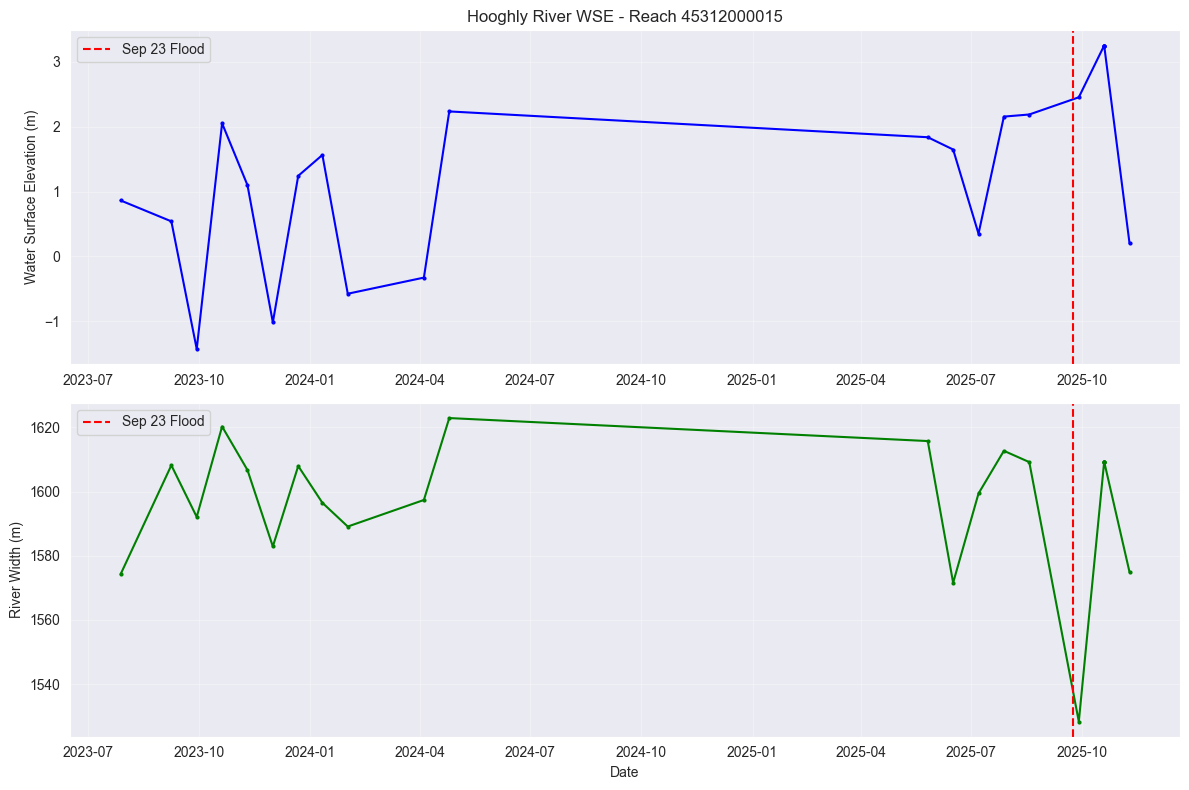


Saved plot to ../data/swot/hooghly_wse_timeseries.png


In [23]:
import matplotlib.pyplot as plt

# Plot WSE time series for a single reach
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Get the reach with most observations
top_reach = hooghly_df.groupby('reach_id').size().idxmax()
reach_data = hooghly_df[hooghly_df['reach_id'] == top_reach].sort_values('date')

# WSE over time
axes[0].plot(reach_data['date'], reach_data['wse'], 'b.-', markersize=4)
axes[0].axvline(pd.to_datetime('2025-09-23'), color='red', linestyle='--', label='Sep 23 Flood')
axes[0].set_ylabel('Water Surface Elevation (m)')
axes[0].set_title(f'Hooghly River WSE - Reach {top_reach}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Width over time
axes[1].plot(reach_data['date'], reach_data['width'], 'g.-', markersize=4)
axes[1].axvline(pd.to_datetime('2025-09-23'), color='red', linestyle='--', label='Sep 23 Flood')
axes[1].set_ylabel('River Width (m)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/swot/hooghly_wse_timeseries.png', dpi=150)
plt.show()

print(f"\nSaved plot to ../data/swot/hooghly_wse_timeseries.png")

In [24]:
# Focus on September 2025
sep_2025 = hooghly_df[hooghly_df['date'].dt.strftime('%Y-%m') == '2025-09'].copy()

print("September 2025 Hooghly observations:")
print(f"Count: {len(sep_2025)}")

if len(sep_2025) > 0:
    display(sep_2025[['date', 'reach_id', 'wse', 'wse_u', 'width', 'width_u', 'area_total']].sort_values('date'))

    # Compare to baseline (2023-2024 average for same reach)
    sep_reaches = sep_2025['reach_id'].unique()

    for reach in sep_reaches[:3]:  # Check first 3 reaches
        reach_all = hooghly_df[hooghly_df['reach_id'] == reach]
        baseline = reach_all[reach_all['date'] < '2025-01-01']
        sep_data = reach_all[reach_all['date'].dt.strftime('%Y-%m') == '2025-09']

        if len(baseline) > 0 and len(sep_data) > 0:
            print(f"\n--- Reach {reach} ---")
            print(f"Baseline WSE (2023-2024): {baseline['wse'].mean():.2f} ± {baseline['wse'].std():.2f} m")
            print(f"Sep 2025 WSE: {sep_data['wse'].values[0]:.2f} m")
            print(f"Anomaly: +{sep_data['wse'].values[0] - baseline['wse'].mean():.2f} m")
            print(f"Baseline width: {baseline['width'].mean():.0f} m")
            print(f"Sep 2025 width: {sep_data['width'].values[0]:.0f} m")

September 2025 Hooghly observations:
Count: 11


,date,reach_id,wse,wse_u,width,width_u,area_total
455,2025-09-28,45312000015,2.455300e+00,1.031900e-01,1.528371e+03,5.646300e-01,2.483694e+07
456,2025-09-28,45312000025,2.247400e+00,1.053200e-01,1.105056e+03,5.866210e-01,2.174835e+07
457,2025-09-28,45312000035,2.006800e+00,5.764100e-01,6.610574e+02,6.481180e-01,1.298093e+07
458,2025-09-28,45312000045,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
459,2025-09-28,45312000055,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
460,2025-09-28,45312000065,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12,-1.000000e+12
461,2025-09-28,45312000095,6.561200e+00,8.094100e-01,2.992919e+02,1.027213e+00,5.879397e+06
462,2025-09-28,45312000115,6.212000e+00,1.252000e-01,4.538319e+02,9.013010e-01,3.974103e+06
463,2025-09-28,45312000125,6.708900e+00,2.781500e-01,4.045471e+02,1.069595e+00,3.559573e+06
464,2025-09-28,45312000135,7.301500e+00,1.285100e-01,3.597138e+02,9.812620e-01,3.166038e+06



--- Reach 45312000015 ---
Baseline WSE (2023-2024): 0.57 ± 1.24 m
Sep 2025 WSE: 2.46 m
Anomaly: +1.89 m
Baseline width: 1600 m
Sep 2025 width: 1528 m

--- Reach 45312000025 ---
Baseline WSE (2023-2024): 0.77 ± 1.07 m
Sep 2025 WSE: 2.25 m
Anomaly: +1.48 m
Baseline width: 1148 m
Sep 2025 width: 1105 m

--- Reach 45312000035 ---
Baseline WSE (2023-2024): 0.90 ± 1.02 m
Sep 2025 WSE: 2.01 m
Anomaly: +1.11 m
Baseline width: 705 m
Sep 2025 width: 661 m


In [25]:
# Check if there are quality issues in Sep 2025
print("Quality check - WSE uncertainty:")
print(f"Overall mean wse_u: {hooghly_df['wse_u'].mean():.4f}")
print(f"Sep 2025 mean wse_u: {sep_2025['wse_u'].mean():.4f}")

print("\nQuality check - Width uncertainty:")
print(f"Overall mean width_u: {hooghly_df['width_u'].mean():.4f}")
print(f"Sep 2025 mean width_u: {sep_2025['width_u'].mean():.4f}")

# Check if the data gap matters
print("\n--- Temporal Coverage ---")
print(f"Total unique dates: {hooghly_df['date'].nunique()}")
print("\nObservations by year-month:")
print(hooghly_df.groupby(hooghly_df['date'].dt.to_period('M')).size().tail(12))

Quality check - WSE uncertainty:
Overall mean wse_u: -277343749999.5120
Sep 2025 mean wse_u: -272727272726.7913

Quality check - Width uncertainty:
Overall mean width_u: -269531249999.1515
Sep 2025 mean width_u: -272727272726.4293

--- Temporal Coverage ---
Total unique dates: 20

Observations by year-month:
date
2023-11    11
2023-12    22
2024-01    11
2024-02    11
2024-04    22
2025-05    25
2025-06    11
2025-07    22
2025-08    11
2025-09    11
2025-10    44
2025-11    11
Freq: M, dtype: int64


In [26]:
# Create WSE anomaly feature - this is what matters for flood prediction!
# For each reach, calculate anomaly relative to historical baseline

wse_features = []

for reach_id in hooghly_df['reach_id'].unique():
    reach_data = hooghly_df[hooghly_df['reach_id'] == reach_id].copy()

    # Calculate rolling baseline (all prior observations)
    reach_data = reach_data.sort_values('date')
    reach_data['wse_baseline'] = reach_data['wse'].expanding().mean().shift(1)
    reach_data['wse_anomaly'] = reach_data['wse'] - reach_data['wse_baseline']
    reach_data['wse_zscore'] = (reach_data['wse'] - reach_data['wse_baseline']) / reach_data['wse'].expanding().std().shift(1)

    wse_features.append(reach_data)

wse_df = pd.concat(wse_features, ignore_index=True)

# Check anomaly for Sep 2025
sep_anomaly = wse_df[wse_df['date'].dt.strftime('%Y-%m') == '2025-09']
print("September 2025 WSE Anomalies:")
if len(sep_anomaly) > 0:
    display(sep_anomaly[['date', 'reach_id', 'wse', 'wse_baseline', 'wse_anomaly', 'wse_zscore']].round(2))
    print(f"\nMean WSE anomaly: +{sep_anomaly['wse_anomaly'].mean():.2f} m")
    print(f"Mean Z-score: {sep_anomaly['wse_zscore'].mean():.2f} σ")

September 2025 WSE Anomalies:


,date,reach_id,wse,wse_baseline,wse_anomaly,wse_zscore
16,2025-09-28,45312000015,2.460000e+00,9.000000e-01,1.550000e+00,1.29
38,2025-09-28,45312000025,2.250000e+00,1.000000e+00,1.250000e+00,1.24
60,2025-09-28,45312000035,2.010000e+00,9.700000e-01,1.030000e+00,0.84
82,2025-09-28,45312000045,-1.000000e+12,-1.000000e+12,0.000000e+00,NaN
104,2025-09-28,45312000055,-1.000000e+12,-1.000000e+12,0.000000e+00,NaN
126,2025-09-28,45312000065,-1.000000e+12,-1.000000e+12,0.000000e+00,NaN
148,2025-09-28,45312000095,6.560000e+00,-6.250000e+10,6.250000e+10,0.25
170,2025-09-28,45312000115,6.210000e+00,5.100000e+00,1.110000e+00,0.94
192,2025-09-28,45312000125,6.710000e+00,5.840000e+00,8.700000e-01,0.73
214,2025-09-28,45312000135,7.300000e+00,6.400000e+00,9.100000e-01,0.83



Mean WSE anomaly: +5681818182.65 m
Mean Z-score: 0.87 σ


In [28]:
# SWOT uses -999999999999 (approx -1e12) as NODATA
# Filter these out
import numpy as np

NODATA_THRESHOLD = -1e10  # Anything below this is NODATA

# Clean the main dataframe
hooghly_clean = hooghly_df.copy()

# Replace NODATA with NaN for key columns
numeric_cols = ['wse', 'wse_u', 'width', 'width_u', 'slope', 'area_total',
                'dschg_c', 'dschg_gc']

for col in numeric_cols:
    if col in hooghly_clean.columns:
        hooghly_clean.loc[hooghly_clean[col] < NODATA_THRESHOLD, col] = np.nan

# Check how much data we lost
print("Data quality after cleaning:")
for col in ['wse', 'width', 'dschg_c']:
    if col in hooghly_clean.columns:
        valid = hooghly_clean[col].notna().sum()
        total = len(hooghly_clean)
        print(f"  {col}: {valid}/{total} valid ({100*valid/total:.1f}%)")

# Recalculate September 2025 stats
sep_clean = hooghly_clean[hooghly_clean['date'].dt.strftime('%Y-%m') == '2025-09']
print(f"\nSeptember 2025 (cleaned):")
print(f"  Valid WSE observations: {sep_clean['wse'].notna().sum()}")
print(f"  Mean WSE: {sep_clean['wse'].mean():.2f} m")
print(f"  Valid width observations: {sep_clean['width'].notna().sum()}")
print(f"  Mean width: {sep_clean['width'].mean():.0f} m")

Data quality after cleaning:
  wse: 185/256 valid (72.3%)
  width: 187/256 valid (73.0%)
  dschg_c: 0/256 valid (0.0%)

September 2025 (cleaned):
  Valid WSE observations: 8
  Mean WSE: 5.18 m
  Valid width observations: 8
  Mean width: 639 m


In [29]:
# Recalculate anomalies with clean data
wse_features_clean = []

for reach_id in hooghly_clean['reach_id'].unique():
    reach_data = hooghly_clean[hooghly_clean['reach_id'] == reach_id].copy()
    reach_data = reach_data.sort_values('date')

    # Only calculate if we have valid WSE
    if reach_data['wse'].notna().sum() > 1:
        reach_data['wse_baseline'] = reach_data['wse'].expanding().mean().shift(1)
        reach_data['wse_std'] = reach_data['wse'].expanding().std().shift(1)
        reach_data['wse_anomaly'] = reach_data['wse'] - reach_data['wse_baseline']
        reach_data['wse_zscore'] = reach_data['wse_anomaly'] / reach_data['wse_std']
        wse_features_clean.append(reach_data)

wse_clean_df = pd.concat(wse_features_clean, ignore_index=True)

# September 2025 anomalies (cleaned)
sep_anomaly_clean = wse_clean_df[
    (wse_clean_df['date'].dt.strftime('%Y-%m') == '2025-09') &
    (wse_clean_df['wse'].notna())
]

print("September 2025 WSE Anomalies (CLEANED):")
display(sep_anomaly_clean[['date', 'reach_id', 'wse', 'wse_baseline', 'wse_anomaly', 'wse_zscore']].round(2))

print(f"\n--- Summary ---")
print(f"Valid reaches: {len(sep_anomaly_clean)}")
print(f"Mean WSE: {sep_anomaly_clean['wse'].mean():.2f} m")
print(f"Mean baseline: {sep_anomaly_clean['wse_baseline'].mean():.2f} m")
print(f"Mean anomaly: +{sep_anomaly_clean['wse_anomaly'].mean():.2f} m")
print(f"Mean Z-score: {sep_anomaly_clean['wse_zscore'].mean():.2f} σ")

September 2025 WSE Anomalies (CLEANED):


,date,reach_id,wse,wse_baseline,wse_anomaly,wse_zscore
16,2025-09-28,45312000015,2.46,0.90,1.55,1.29
38,2025-09-28,45312000025,2.25,1.00,1.25,1.24
60,2025-09-28,45312000035,2.01,0.97,1.03,0.84
82,2025-09-28,45312000095,6.56,5.40,1.16,0.42
104,2025-09-28,45312000115,6.21,5.10,1.11,0.94
126,2025-09-28,45312000125,6.71,5.84,0.87,0.73
148,2025-09-28,45312000135,7.30,6.40,0.91,0.83
170,2025-09-28,45312000145,7.98,7.01,0.96,0.87



--- Summary ---
Valid reaches: 8
Mean WSE: 5.18 m
Mean baseline: 4.08 m
Mean anomaly: +1.10 m
Mean Z-score: 0.89 σ


In [30]:
# Save cleaned Hooghly data with anomaly features
output_cols = [
    'reach_id', 'date', 'river_name', 'p_lat', 'p_lon',
    'wse', 'wse_baseline', 'wse_anomaly', 'wse_zscore',
    'width', 'area_total', 'dschg_c'
]

# Keep only columns that exist
output_cols_available = [c for c in output_cols if c in wse_clean_df.columns]
export_df = wse_clean_df[output_cols_available].copy()

# Save
output_path = Path("../data/swot/hooghly_wse_features.csv")
export_df.to_csv(output_path, index=False)

print(f"Saved: {output_path}")
print(f"Shape: {export_df.shape}")
print(f"Date range: {export_df['date'].min()} to {export_df['date'].max()}")
print(f"Valid WSE anomalies: {export_df['wse_anomaly'].notna().sum()}")

Saved: ../data/swot/hooghly_wse_features.csv
Shape: (176, 12)
Date range: 2023-07-28 00:00:00 to 2025-11-09 00:00:00
Valid WSE anomalies: 167
